### RÉNYI-REGULARIZED OT

- Creator:  Jonas Bresch, M.Sc
- Date: April 24th, 2024

In [66]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import cvxpy as cp
from scipy.stats import norm
import ot
import ot.plot
from scipy.optimize import minimize
from scipy.stats import poisson
from scipy.stats import multivariate_normal
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

import imp

In [67]:
import Projections
import renyi

In [68]:
imp.reload(Projections)
imp.reload(renyi)

<module 'renyi' from '/Users/jonasbresch/Desktop/renyi/github/renyi.py'>

In [14]:
'Gaussian'
n = 100
l = np.linspace(0, 1, n)
r = norm.pdf(l, loc=.5, scale=.1) # + norm.pdf(l, loc=.15, scale=.1)
rr = norm.pdf(l, loc=.500001, scale=.1) 
c = norm.pdf(l, loc=.75, scale=.075)
r /= np.sum(r)
rr /= np.sum(rr)
c /= np.sum(c)
M = ot.dist(l.reshape((n, 1)), l.reshape((n, 1)), 'sqeuclidean') 
#
# euclidean
# sqeuclidean
# canberra
# minkowski
# seuclidean
#


In [5]:
'mixed-Gaussian'
n = 100
l = np.linspace(0, 1, n)
r = norm.pdf(l, loc=.5, scale=.1) # + norm.pdf(l, loc=.15, scale=.1)
r += norm.pdf(l, loc=.2, scale=.05)
c = norm.pdf(l, loc=.75, scale=.075)
#c += norm.pdf(l, loc=.55, scale=.5)
c += norm.pdf(l, loc=.3, scale=.04)
r /= np.sum(r)
c /= np.sum(c)
M = ot.dist(l.reshape((n, 1)), l.reshape((n, 1)), 'sqeuclidean') 
M /= M.max()
#
# euclidean
# sqeuclidean
# canberra
#

In [6]:
'mixed-All'
n = 100
l = np.linspace(0, 1, n)
r = np.zeros(n)
for i in range(n):
    if i>35 and i<45 and np.mod(i,2) == 0:
        r[i] = 1
    if i>66 and i<90:
        r[i] = 1
r /= np.sum(r)

c = norm.pdf(l, loc=.25, scale=.15)
for i in range(n):
    if i>66 and i<90 and np.mod(i,2) == 0:
        c[i] = 1
c /= np.sum(c)

M = ot.dist(l.reshape((n, 1)), l.reshape((n, 1)), 'sqeuclidean') 
M /= M.max()
#
# euclidean
# sqeuclidean
# canberra
#

In [7]:
'(mix)-Uniform'
n = 50
l = np.linspace(0, 1, n)
r = np.zeros(n)
c = np.zeros(n)
for i in range(n):
    if i > 25 and i < 45:
        r[i] = 1
    if i > 15 and i < 40:
        c[i] = 1
r /= np.sum(r)
c /= np.sum(c)
M = ot.dist(l.reshape((n, 1)), l.reshape((n, 1)), 'sqeuclidean') 
M /= M.max()


In [19]:
'(mix)-Poisson'
n = 100
x = range(n)
l = np.linspace(0, 1, n)
mu1 = [10,50]
mu2 = [25,60,85]
t1 = [0.5,0.5]
t2 = [0.2,0.8,0.1]

r_tmp = []    
for mode in mu1:
    r_tmp.append(poisson.pmf(x,mode))
        
c_tmp = []    
for mode in mu2:
    c_tmp.append(poisson.pmf(x,mode))
        
r = np.dot(t1,r_tmp)
r = r/r.sum()
    
c = np.dot(t2,c_tmp)
c = c/c.sum()

M = ot.dist(l.reshape((n, -1)), l.reshape((n, -1)), 'sqeuclidean') 
M /= M.max()


In [535]:
n = 50
x = range(n)
mu1 = [10,30]
mu2 = [5,20,35]
t1 = [0.5,0.5]
t2 = [0.2,0.8,0.2]

r_tmp = []    
for mode in mu1:
    r_tmp.append(poisson.pmf(x,mode))
        
c_tmp = []    
for mode in mu2:
    c_tmp.append(poisson.pmf(x,mode))
        
r = np.dot(t1,r_tmp)
r = r/r.sum()
    
c = np.dot(t2,c_tmp)
c = c/c.sum()

l = np.linspace(0, 1, n)
M = ot.dist(l.reshape((n, -1)), l.reshape((n, -1)), 'sqeuclidean') 


### Algoritm from our paper, proposed in Alg. 1 
- using the generalized Polyak step size from [Two Polyak-Type Step Sizes for Mirror Descent](https://arxiv.org/pdf/2210.01532.pdf)

In [71]:
PPRbest, PPR, fPPR_0 = renyi.KLprojMirrorDescentPolyak(0.01,M,r,c,10,1e-6,1e-4,2001,1,1,1000)

#
# setting for mixed-Poisson: 1e-4,2001,100,0.5,0.75 or 1e-4,2001,1,0.1,0.75 (or 1e-4,2001,1,100,1000) for changed infty-morm as the dual of the 1-norm)
#
# setting for mixed-All: 1e-1/2,2001,1,1,1 
# 
# setting for uniform: 1e-2,2001,0.2,10,10

iteration 	| func-value 	| residuum 	| update 	| stepsize 
--------------------------------------------------------------------------------------
0 		|  1.424e-01 	| nan 		| nan
100 		|  1.180e-01 	|  9.980e-05 	| 1 		|  1.011e-01
200 		|  9.057e-02 	|  2.386e-04 	| 1 		|  8.464e-01
300 		|  8.469e-02 	|  1.240e-04 	| 1 		|  1.418e+00
400 		|  8.380e-02 	|  9.115e-05 	| 1 		|  1.920e+00
500 		|  8.351e-02 	|  8.127e-05 	| 1 		|  2.417e+00
600 		|  8.336e-02 	|  6.716e-05 	| 1 		|  2.641e+00
700 		|  8.329e-02 	|  1.107e-05 	| 0 		|  5.279e-01
800 		|  8.324e-02 	|  4.990e-05 	| 1 		|  2.871e+00
900 		|  8.321e-02 	|  5.028e-06 	| 0 		|  3.090e-01
1000 		|  8.319e-02 	|  6.448e-05 	| 1 		|  4.901e+00
1100 		|  8.317e-02 	|  1.050e-05 	| 0 		|  8.989e-01


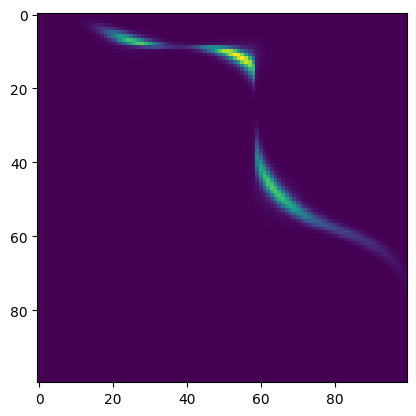

In [72]:
plt.imshow(PPRbest)

### Heuristic, using Mirror Descent without Polyak step size

In [69]:
PRbest, PR, fPR, PRmin = renyi.KLprojMirrorDescent(0.01,M,r,c,10,1e-6,1e-4, 2001, rate = 1, rate_type = "constant", a = 10000)

# constant 
# constant_length
# diminishing
# square_summable
# square_summable_a
# NONE

iteration 	| func-value 	| residuum 	| update 	| stepsize 
---------------------------------------------------------------------
0 		|  1.424e-01 	| nan 		| nan
100 		|  8.569e-02 	|  1.280e-04 	| 1 		|  1.000e+00 	|  7.438e-01
200 		|  8.425e-02 	|  6.762e-05 	| 1 		|  1.000e+00 	|  9.779e-01
300 		|  8.380e-02 	|  4.745e-05 	| 0 		|  1.000e+00 	|  1.110e+00
400 		|  8.359e-02 	|  3.742e-05 	| 0 		|  1.000e+00 	|  1.202e+00
500 		|  8.347e-02 	|  3.127e-05 	| 1 		|  1.000e+00 	|  1.272e+00
600 		|  8.339e-02 	|  2.694e-05 	| 1 		|  1.000e+00 	|  1.328e+00
700 		|  8.333e-02 	|  2.367e-05 	| 1 		|  1.000e+00 	|  1.375e+00
800 		|  8.329e-02 	|  2.110e-05 	| 1 		|  1.000e+00 	|  1.415e+00
900 		|  8.326e-02 	|  1.901e-05 	| 1 		|  1.000e+00 	|  1.450e+00
1000 		|  8.324e-02 	|  1.747e-05 	| 0 		|  1.000e+00 	|  1.481e+00
1100 		|  8.322e-02 	|  1.584e-05 	| 1 		|  1.000e+00 	|  1.509e+00
1200 		|  8.321e-02 	|  1.460e-05 	| 1 		|  1.000e+00 	|  1.534e+00
1300 		|  8.319e-02 	|  1.354e-0

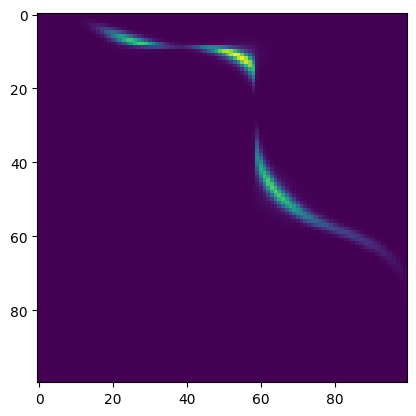

In [70]:
plt.imshow(PRbest)

### Subgradient method, solving the dual problem

In [56]:
qBest, func_qBest, qQ, qQlist = renyi.SubGradDes(r, c, 10, 0.01, M, 50001)

F 		| step 		| q-res 	| update
--------------------------------------------------------------
 2.206e-01 	|  5.000e+00 	|    1.2e+00 	| nan
 1.158e-02 	|  9.766e-03 	|    1.6e-03 	| 1
-1.681e-02 	|  2.441e-03 	|    1.6e-04 	| 1
-3.049e-02 	|  2.441e-03 	|    3.8e-04 	| 1
-4.017e-02 	|  4.883e-03 	|    5.0e-04 	| 1
-4.734e-02 	|  2.441e-03 	|    8.2e-05 	| 1
-5.295e-02 	|  2.441e-03 	|    8.0e-05 	| 1
-5.673e-02 	|  2.441e-03 	|    6.7e-05 	| 1
-5.849e-02 	|  4.883e-03 	|    1.4e-04 	| 1
-6.116e-02 	|  2.441e-03 	|    1.3e-04 	| 1
-6.345e-02 	|  1.221e-03 	|    3.0e-05 	| 1
-6.521e-02 	|  2.441e-03 	|    7.4e-05 	| 1
-6.733e-02 	|  2.441e-03 	|    5.8e-05 	| 1
-6.840e-02 	|  2.441e-03 	|    5.1e-05 	| 1
-6.929e-02 	|  2.441e-03 	|    4.4e-05 	| 1
-7.005e-02 	|  2.441e-03 	|    4.5e-05 	| 1
-7.112e-02 	|  1.562e-01 	|    3.0e-03 	| 1
-7.178e-02 	|  2.441e-03 	|    4.1e-05 	| 1
-7.254e-02 	|  2.441e-03 	|    3.9e-05 	| 1
-7.304e-02 	|  2.441e-03 	|    3.7e-05 	| 1
-7.387e-02 	|  4.883e-03

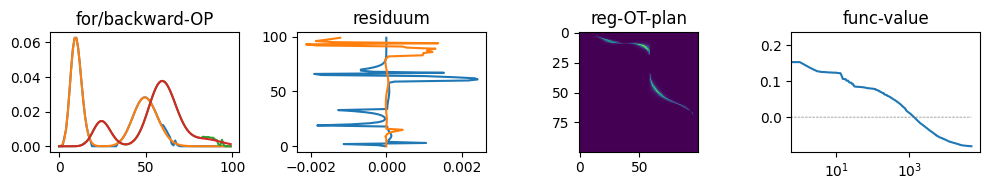

In [57]:
PDual = renyi.saverenyi(r, c, M, np.array(qBest), np.array(func_qBest), 0.01, 10, 0, 0)

### Voter migration example

In [217]:
def VotingSet(gam):

    'order: CDU | SPD | Grüne | Linke | FDP | AFD | Andere | Nichtwähler'

    mu_cdu = [1.00, 0.70, 0.54, 0.37, 0.68, 0.57, 0.52, 1.00]
    mu_spd = [0.70, 1.00, 0.74, 0.62, 0.57, 0.45, 0.58, 1.00]
    mu_gruenen = [0.54, 0.74, 1.00, 0.83, 0.46, 0.37, 0.68, 1.00]
    mu_links = [0.37, 0.62, 0.83, 1.00, 0.39, 0.33, 0.66, 1.00]
    mu_fdp = [0.68, 0.57, 0.46, 0.39, 1.00, 0.64, 0.54, 1.00]
    mu_afd = [0.57, 0.45, 0.37, 0.33, 0.64, 1.00, 0.46, 1.00]
    mu_andere = [0.52, 0.58, 0.68, 0.66, 0.54, 0.46, 1.00, 1.00]
    mu_nicht = [1.00, 1.00, 1.00, 1.00, 1.00, 1.00 , 1.00, 1.00]
    
    mu = np.zeros((8,8))

    mu[0,:] = np.array(mu_cdu)
    mu[1,:] = np.array(mu_spd)
    mu[2,:] = np.array(mu_gruenen)
    mu[3,:] = np.array(mu_links)
    mu[4,:] = np.array(mu_fdp)
    mu[5,:] = np.array(mu_afd)
    mu[6,:] = np.array(mu_andere)
    mu[7,:] = np.array(mu_nicht)

    # distance matrix 
    M1 = np.zeros((8,8))
    M2 = np.zeros((8,8))
    M3 = np.zeros((8,8))
    M4 = np.zeros((8,8))
    M5 = np.zeros((8,8))
    M6 = np.zeros((8,8))

    for i in range(8):
        for j in range(8):
            M1[i,j] = np.sqrt(2 - 2*np.exp(-gam*np.linalg.norm(mu[i,:] - mu[j,:])**2))
            M2[i,j] = 1/gam*np.linalg.norm(mu[i,:] - mu[j,:])**2
            M3[i,j] = 1/gam*np.linalg.norm(mu[i,:] - mu[j,:])
            M4[i,j] = np.sqrt(2*np.linalg.norm(mu[i,:] - mu[j,:]))
            M5[i,j] = np.sqrt(2*(1/gam - 1/np.sqrt(gam**2 + np.linalg.norm(mu[i,:] - mu[j,:])**2)))
            if i != j:
                M6[i,j] = 1
    
    # margianls
    vote_2021_1_ohne = [0.180, 0.214, 0.189, 0.141, 0.071, 0.080, 0.125]
    vote_2021_1_berechtigt = 2447600
    vote_2021_1_waehlende = 1844278
    vote_2021_1_nicht = 1 - 1844278/2447600

    vote_2021_1 = np.array(vote_2021_1_ohne)*(1 - vote_2021_1_nicht)
    vote_2021_1 = np.append(vote_2021_1, vote_2021_1_nicht)

    vote_2023_1_ohne = [0.282, 0.184, 0.184, 0.122, 0.046, 0.092, 0.090]
    vote_2023_1_berechtigt = 2431776
    vote_2023_1_waehlende = 1529558
    vote_2023_1_nicht = 1 - 1529558/2431776

    vote_2023_1 = np.array(vote_2023_1_ohne)*(1 - vote_2023_1_nicht)
    vote_2023_1 = np.append(vote_2023_1, vote_2023_1_nicht)

    # ground truth 
    A = np.array([
   [240, 7, 2, 1, 8, 7, 3, 44],
   [60, 188, 17, 9, 5, 5, 8, 78],
   [17, 29, 198, 18, 3, 0, 12, 48],
   [11,11,22,133,0,7,11,46],
   [37,7,0,0,40,4,3,30],
   [12,1,0,0,1,82,3,39],
   [21,5,7,9,2,15,83,72],
   [21,21,14,6,5,13,6,505]
   ])
    
    return [M1, M2, M3, M4, M5, M6, vote_2021_1, vote_2023_1, vote_2021_1_ohne, vote_2023_1_ohne, A]


In [22]:
def VotingSet_permute(gam):

    'order: CDU | SPD | Grüne | Linke | FDP | AFD | Andere | Nichtwähler'

    mu_cdu = [1.00, 0.70, 0.54, 0.37, 0.68, 0.57, 0.52, 1.00]
    mu_spd = [0.70, 1.00, 0.74, 0.62, 0.57, 0.45, 0.58, 1.00]
    mu_gruenen = [0.54, 0.74, 1.00, 0.83, 0.46, 0.37, 0.68, 1.00]
    mu_links = [0.37, 0.62, 0.83, 1.00, 0.39, 0.33, 0.66, 1.00]
    mu_fdp = [0.68, 0.57, 0.46, 0.39, 1.00, 0.64, 0.54, 1.00]
    mu_afd = [0.57, 0.45, 0.37, 0.33, 0.64, 1.00, 0.46, 1.00]
    mu_andere = [0.52, 0.58, 0.68, 0.66, 0.54, 0.46, 1.00, 1.00]
    mu_nicht = [1.00, 1.00, 1.00, 1.00, 1.00, 1.00 , 1.00, 1.00]
    
    mu = np.zeros((8,8))

    mu[0,:] = np.array(mu_cdu)
    mu[1,:] = np.array(mu_spd)
    mu[2,:] = np.array(mu_gruenen)
    mu[3,:] = np.array(mu_links)
    mu[7,:] = np.array(mu_fdp)
    mu[6,:] = np.array(mu_afd)
    mu[5,:] = np.array(mu_andere)
    mu[4,:] = np.array(mu_nicht)

    # distance matrix 
    M1 = np.zeros((8,8))
    M2 = np.zeros((8,8))
    M3 = np.zeros((8,8))

    for i in range(8):
        for j in range(8):
            M1[i,j] = np.sqrt(2 - 2*np.exp(-gam*np.linalg.norm(mu[i,:] - mu[j,:])**2))
            M2[i,j] = 1/gam*np.linalg.norm(mu[i,:] - mu[j,:])**2
            M3[i,j] = 1/gam*np.linalg.norm(mu[i,:] - mu[j,:])
    
    # margianls
    vote_2021_1_ohne = [0.197, 0.234, 0.200, 0.140, 0.080, 0.066, 0.083]
    vote_2021_1_berechtigt = 2447600
    vote_2021_1_waehlende = 1844278
    vote_2021_1_nicht = 1 - 1844278/2447600

    vote_2021_1 = np.array(vote_2021_1_ohne)*(1 - vote_2021_1_nicht)
    vote_2021_1 = np.append(vote_2021_1, vote_2021_1_nicht)

    vote_2023_1_ohne = [0.297, 0.199, 0.191, 0.123, 0.091, 0.039, 0.060]
    vote_2023_1_berechtigt = 2431776
    vote_2023_1_waehlende = 1529558
    vote_2023_1_nicht = 1 - 1529558/2431776

    vote_2023_1 = np.array(vote_2023_1_ohne)*(1 - vote_2023_1_nicht)
    vote_2023_1 = np.append(vote_2023_1, vote_2023_1_nicht)

    vote_2021_1[[4,7]] = vote_2021_1[[7,4]]
    vote_2023_1[[4,7]] = vote_2023_1[[7,4]]

    vote_2021_1[[5,6]] = vote_2021_1[[6,5]]
    vote_2023_1[[5,6]] = vote_2023_1[[6,5]]
    
    return [M2, vote_2021_1, vote_2023_1, vote_2021_1_ohne, vote_2023_1_ohne]

In [221]:
Mrbf, Msq, Meucl, Mriesz, Mres, Mno, mu1, mu2, nu1, nu2, MT = VotingSet(1)

Mneucl = Meucl/np.max(Meucl)

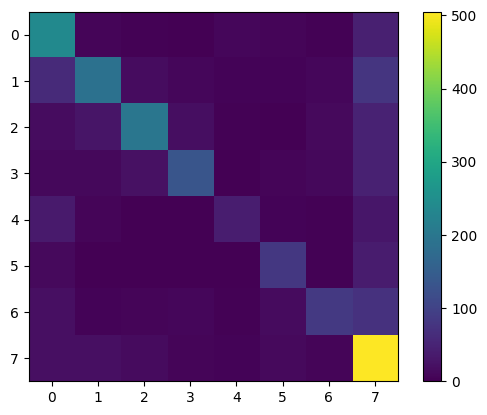

In [71]:
plt.imshow(MT)
plt.colorbar()

In [242]:
PRbest, PR, fPR = renyi.KLprojMirrorDescent(0.1,Mneucl,mu1,mu2,0.5,1e-2, 10001, rate = 0.01, rate_type = "constant", a = 10000000000)

iteration 	| func-value 	| residuum 	| update 
----------------------------------------------------------
0 		|  5.759e-01 	| nan 		| nan
1000 		|  3.561e-01 	|  7.021e-04 	| 0
2000 		|  3.548e-01 	|  3.616e-04 	| 0
3000 		|  3.544e-01 	|  3.603e-04 	| 1
4000 		|  3.551e-01 	|  7.218e-04 	| 0
5000 		|  3.547e-01 	|  3.616e-04 	| 0
6000 		|  3.544e-01 	|  3.602e-04 	| 1
7000 		|  3.551e-01 	|  7.218e-04 	| 0
8000 		|  3.547e-01 	|  3.616e-04 	| 0
9000 		|  3.544e-01 	|  3.602e-04 	| 1
10000 		|  3.551e-01 	|  7.218e-04 	| 0


In [76]:
q_vote, F_vote, q_best_vote, qQlist = renyi.SubGradDes(mu1, mu2, 1, 0.3, Mriesz, 10000)

F 		| step 		| q-res 	| update
--------------------------------------------------------------
-4.106e-01 	|  1.250e+00 	|    4.0e-01 	| nan
-4.986e-01 	|  9.313e-09 	|    0.0e+00 	| 1
-4.986e-01 	|  9.313e-09 	|    0.0e+00 	| 0
-4.986e-01 	|  9.313e-09 	|    0.0e+00 	| 0
-4.986e-01 	|  9.313e-09 	|    0.0e+00 	| 0
-4.986e-01 	|  9.313e-09 	|    0.0e+00 	| 0
-4.986e-01 	|  9.313e-09 	|    0.0e+00 	| 0
-4.986e-01 	|  9.313e-09 	|    0.0e+00 	| 0
-4.986e-01 	|  9.313e-09 	|    0.0e+00 	| 0
-4.986e-01 	|  9.313e-09 	|    0.0e+00 	| 0


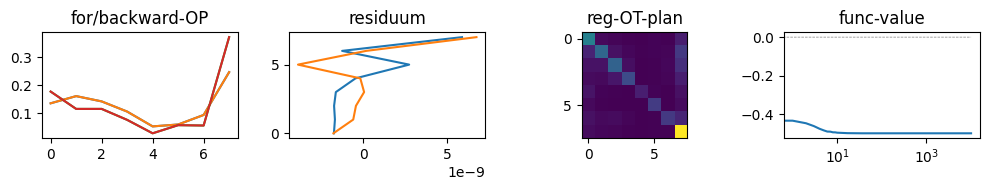

In [77]:
P = renyi.saverenyi(mu1, mu2, Meucl, q_vote, F_vote, 0.3, 1, 0, 0)

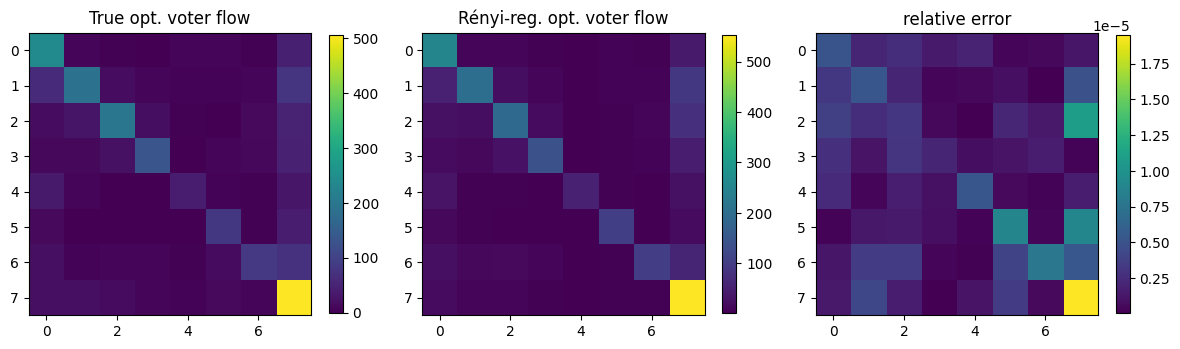

In [243]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
a1 = ax1.imshow(MT)
ax1.set_title('True opt. voter flow')
fig.colorbar(a1, ax = ax1, location='right', shrink=0.75)

ax2 = fig.add_subplot(132)
a2 = ax2.imshow(PR*2447600/1000)
ax2.set_title('Rényi-reg. opt. voter flow')
fig.colorbar(a2, ax = ax2, location='right', shrink=0.75)

ax3 = fig.add_subplot(133)
a3 = ax3.imshow(np.abs((PR*2447600/1000 - MT)/2447600))
ax3.set_title('relative error')
fig.colorbar(a3, ax = ax3, location='right', shrink=0.75)

#fig.colorbar(a2, ax = ax2, location='right', shrink=0.5)
fig.tight_layout()
#plt.savefig('eucl_opt_voter_flow_renyi_reg=%s_lam=%s.pdf' % (0.1 ,10), dpi=300)